In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis,iqr
from statsmodels import robust

In [300]:
df = pd.read_csv('IMU_Mega.csv')

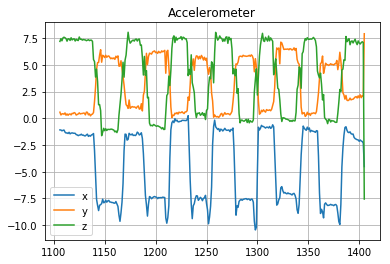

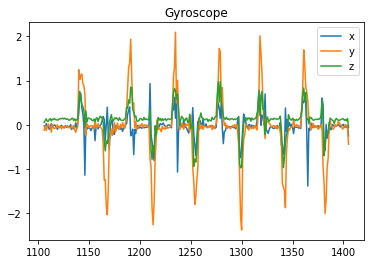

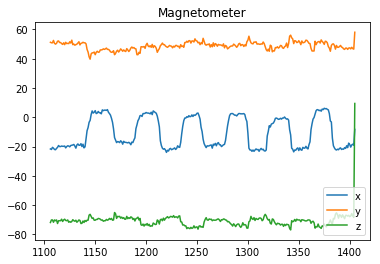

In [422]:
fromRow = 1106
toRow = 1406
#accelerometer
x = df.iloc[fromRow:toRow,1]
y = df.iloc[fromRow:toRow,2]
z = df.iloc[fromRow:toRow,3]
plt.plot(x,label='x')
plt.plot(y,label='y')
plt.plot(z,label='z')
plt.grid()

plt.legend()
plt.title("Accelerometer")
plt.show()
#gyroscope
x = df.iloc[fromRow:toRow,4]
y = df.iloc[fromRow:toRow,5]
z = df.iloc[fromRow:toRow,6]
plt.plot(x,label='x')
plt.plot(y,label='y')
plt.plot(z,label='z')
plt.legend()
plt.title("Gyroscope")
plt.show()
#Magnetometer
x = df.iloc[fromRow:toRow,7]
y = df.iloc[fromRow:toRow,8]
z = df.iloc[fromRow:toRow,9]
plt.plot(x,label='x')
plt.plot(y,label='y')
plt.plot(z,label='z')
plt.legend()
plt.title("Magnetometer")
plt.show()


In [389]:
df.iloc[1][1]


-8.030562

In [423]:
nintyDegree = []
zeroDegree = []
movement = []
for i in range(fromRow,toRow):
    if df.iloc[i][3]<=8 and df.iloc[i][3]>=6.5:
        nintyDegree.append(i)
    elif df.iloc[i][3]<=1 and df.iloc[i][3]>=-2:
        zeroDegree.append(i)
    elif df.iloc[i][3]<6.5 and df.iloc[i][3]>1:
        movement.append(i)

In [424]:
print(nintyDegree)
print(zeroDegree)
print(movement)

[1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1172, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404]
[1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 12

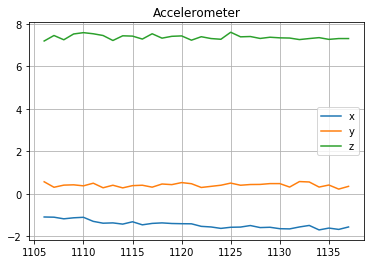

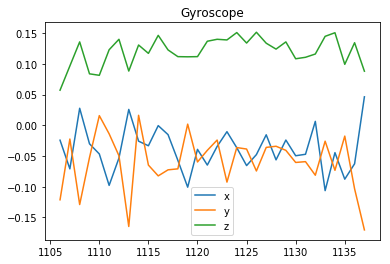

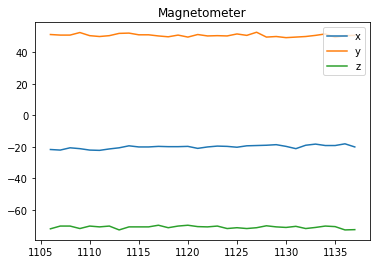

In [425]:
fromRow = 1106
toRow = 1138
#accelerometer
x = df.iloc[fromRow:toRow,1]
y = df.iloc[fromRow:toRow,2]
z = df.iloc[fromRow:toRow,3]
plt.plot(x,label='x')
plt.plot(y,label='y')
plt.plot(z,label='z')
plt.grid()

plt.legend()
plt.title("Accelerometer")
plt.show()
#gyroscope
x = df.iloc[fromRow:toRow,4]
y = df.iloc[fromRow:toRow,5]
z = df.iloc[fromRow:toRow,6]
plt.plot(x,label='x')
plt.plot(y,label='y')
plt.plot(z,label='z')
plt.legend()
plt.title("Gyroscope")
plt.show()
#Magnetometer
x = df.iloc[fromRow:toRow,7]
y = df.iloc[fromRow:toRow,8]
z = df.iloc[fromRow:toRow,9]
plt.plot(x,label='x')
plt.plot(y,label='y')
plt.plot(z,label='z')
plt.legend()
plt.title("Magnetometer")
plt.show()


## Ninty Degree window

In [426]:
x=len(nintyDegree)
for i in range(0,x-1):
    print(nintyDegree[i+1]-nintyDegree[i])

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
34
2
1
1
1
1
1
1
1
1
1
1
1
1
30
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
29
1
1
1
1
1
1
1
1
1
1
1
1
1
1
29
1
1
1
1
1
1
1
1
1
1
1
1
31
1
1
1
1
1
1
1
1
1
1
1
1
29
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [427]:
x=len(nintyDegree)
indexNinty = [0]
for i in range(0,x-1):
    if(nintyDegree[i+1]-nintyDegree[i])>5:
        indexNinty.append(i)
        indexNinty.append(i+1)
indexNinty.append(x-1)
indexNinty

[0, 32, 33, 46, 47, 62, 63, 77, 78, 90, 91, 103, 104, 121]

In [428]:
matrixNinty = df.iloc[nintyDegree[indexNinty[6]]:nintyDegree[indexNinty[7]],1:10]
matrixNinty

,-7.968309,5.621872,-2.016021,-0.054388,-0.04426,0.123338,10.102137,52.31464,-74.004241
1260,-0.924209,0.119716,7.633104,0.032699,-0.086871,0.270347,-19.482692,49.789104,-70.164405
1261,-1.053502,0.162814,7.307476,-0.046665,-0.000051,0.153699,-19.663087,49.608707,-70.338943
1262,-0.967307,0.081407,7.446347,0.130971,-0.100720,0.151834,-19.482692,50.149894,-69.466247
1263,-1.230682,0.181969,7.700145,-0.018701,-0.020291,0.116680,-19.121902,47.985149,-69.815322
1264,-1.019982,0.387880,7.508599,-0.033615,-0.039466,0.114283,-18.941507,49.608707,-69.640785
1265,-1.072657,0.454922,7.470290,0.022312,-0.041330,0.128931,-21.106250,48.165546,-70.688018
1266,-1.192373,0.191546,7.187760,-0.052524,-0.063967,0.134790,-18.400321,50.871475,-70.164405
1267,-1.087023,0.363937,7.388883,-0.054122,-0.063168,0.075933,-18.941507,48.526336,-70.338943
1268,-0.943364,0.521963,7.216492,-0.043202,-0.020824,0.117745,-17.859134,50.330291,-70.338943
1269,-1.087023,0.378303,7.585217,-0.036811,-0.020025,0.094309,-19.482692,49.789104,-70.164405


## Zero degree Window

In [429]:
x=len(zeroDegree)
for i in range(0,x-1):
    print(zeroDegree[i+1]-zeroDegree[i])

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
30
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
29
1
1
1
1
1
1
1
1
1
1
1
1
31
1
1
1
1
1
1
1
1
1
1
1
1
1
1
27
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
28
1
1
1
1
1
1
1
1
1
1
1
1
1


In [433]:
y=len(zeroDegree)
indexZero = [0]
for i in range(5,y-1):
    if(zeroDegree[i+1]-zeroDegree[i])>5:
        indexZero.append(i)
        indexZero.append(i+1)
indexZero

[0, 18, 19, 35, 36, 48, 49, 63, 64, 79, 80]

In [431]:
matrixZero = df.iloc[zeroDegree[indexZero[2]]:zeroDegree[indexZero[3]],1:10]
matrixZero

,-7.968309,5.621872,-2.016021,-0.054388,-0.04426,0.123338,10.102137,52.31464,-74.004241
1194,-7.326631,6.086371,-0.459710,-0.673050,0.490245,0.282598,1.082372,43.655662,-69.117172
1195,-7.393671,6.052850,-0.694354,-0.099396,-0.054913,0.181662,1.262767,48.165546,-73.480628
1196,-7.532542,6.000175,-0.665622,-0.196070,0.075584,0.199239,0.541186,48.165546,-73.829704
1197,-7.436769,6.196510,-0.718297,-0.013907,-0.105247,0.089782,2.525534,47.985149,-72.957015
1198,-7.360151,6.253973,-0.584215,-0.026158,-0.069826,0.081260,2.525534,48.345943,-74.353324
1199,-7.321842,6.297071,-0.636890,-0.078889,-0.010437,0.095641,2.705929,47.083175,-73.131553
1200,-7.369729,6.139046,-0.708720,-0.044800,-0.011236,0.137719,3.247116,49.428314,-73.655166
1201,-7.393671,6.186933,-0.756606,-0.061845,-0.011502,0.143845,2.886325,50.510684,-72.607940
1202,-7.522965,6.067216,-0.703931,-0.078090,0.027380,0.115615,2.886325,48.706733,-74.004241
1203,-7.417615,6.258762,-0.751818,-0.020299,-0.062370,0.106294,2.705929,48.165546,-73.131553


## movement window

In [434]:
x=len(movement)
for i in range(0,x-1):
    print(movement[i+1]-movement[i])

1
1
1
1
1
1
20
1
1
1
1
1
1
16
1
1
1
1
1
1
18
1
1
1
1
17
1
1
1
1
1
1
14
1
1
1
1
1
1
17
1
1
1
1
1
1
16
1
1
1
1
1
14
1
1
1
1
1
1
17
1
1
1
1
1
1
14
1
1
1
1
1
1
15
1
1
1
1
1
1


In [435]:
z = len(movement)
indexMov = [0]
for i in range(0,z-1):
    if(movement[i+1]-movement[i])>5:
        indexMov.append(i)
        indexMov.append(i+1)

indexMov
#len(indexMov)        

[0,
 6,
 7,
 13,
 14,
 20,
 21,
 25,
 26,
 32,
 33,
 39,
 40,
 46,
 47,
 52,
 53,
 59,
 60,
 66,
 67,
 73,
 74]

In [436]:
matrixMove = df.iloc[movement[indexMov[8]]:movement[indexMov[9]],1:10]
matrixMove

,-7.968309,5.621872,-2.016021,-0.054388,-0.04426,0.123338,10.102137,52.31464,-74.004241
1232,0.239432,1.982500,3.984155,0.311003,0.381054,0.420551,-20.384670,48.526336,-67.546325
1233,-2.925864,1.680815,4.563581,0.344027,1.086269,0.719096,-20.565065,47.263568,-67.371788
1234,-5.875670,3.184451,4.094294,0.621000,1.294798,0.823228,-17.137554,49.608707,-71.386169
1235,-8.016196,5.095121,5.933134,0.150679,2.092960,0.769165,-11.184510,48.345943,-71.560707
1236,-9.395327,4.922729,3.318533,0.709951,0.496370,0.588866,-6.133440,48.706733,-73.655166
1237,-8.188588,5.550042,2.901920,-1.066138,1.007439,0.687404,-2.345139,47.804756,-73.480628


## write Ninty degree

In [437]:
count = 1
for i in range(0,len(indexNinty),2):
    matrixNinty = df.iloc[nintyDegree[indexNinty[i]]:nintyDegree[indexNinty[i+1]],1:10].to_numpy()
    mean = np.mean(matrixNinty,0)
    variance = np.var(matrixNinty,0)
    std = np.std(matrixNinty,0)
    median = np.median(matrixNinty,0)
    maximum = np.amax(matrixNinty,0)
    minimum = np.amin(matrixNinty,0)
    rms = np.sqrt(np.mean(matrixNinty**2,0))
    kt = kurtosis(matrixNinty)
    sk = skew(matrixNinty)
    interquartile_range = iqr(matrixNinty,0)
    mad = robust.mad(matrixNinty)
    data = pd.DataFrame({"Mean":mean,
                        "Variance":variance,
                        "Std":std,
                        "median":median,
                        "maximum":maximum,
                        "minimum":minimum,
                        "rms":rms,
                        "kurtosis":kt,
                        "skew":sk,
                        "interquartile range":interquartile_range,
                        "mean absolute deviation":mad})
    data.to_csv("NewDataSet/ninty_sub_1_label_2_point_"+str(count)+".csv",index=False)
    count = count+1
  

## write zero degree data

In [438]:
count = 1
for i in range(0,len(indexZero)-1,2):
    matrixMove = df.iloc[zeroDegree[indexZero[i]]:zeroDegree[indexZero[i+1]],1:10].to_numpy()
    mean = np.mean(matrixZero,0)
    variance = np.var(matrixZero,0)
    std = np.std(matrixZero,0)
    median = np.median(matrixZero,0)
    maximum = np.amax(matrixZero,0)
    minimum = np.amin(matrixZero,0)
    rms = np.sqrt(np.mean(matrixZero**2,0))
    kt = kurtosis(matrixZero)
    sk = skew(matrixZero)
    interquartile_range = iqr(matrixZero,0)
    mad = robust.mad(matrixZero)
    data = pd.DataFrame({"Mean":mean,
                        "Variance":variance,
                        "Std":std,
                        "median":median,
                        "maximum":maximum,
                        "minimum":minimum,
                        "rms":rms,
                        "kurtosis":kt,
                        "skew":sk,
                        "interquartile range":interquartile_range,
                        "mean absolute deviation":mad})
    data.to_csv("NewDataSet/zero_sub_1_label_2_point_"+str(count)+".csv",index=False)
    count = count+1
  

## write movement data

In [439]:
count = 1
for i in range(0,len(indexMov)-1,2):
    matrixMov = df.iloc[movement[indexMov[i]]:movement[indexMov[i+1]],1:10].to_numpy()
    mean = np.mean(matrixMov,0)
    variance = np.var(matrixMov,0)
    std = np.std(matrixMov,0)
    median = np.median(matrixMov,0)
    maximum = np.amax(matrixMov,0)
    minimum = np.amin(matrixMov,0)
    rms = np.sqrt(np.mean(matrixMov**2,0))
    kt = kurtosis(matrixMov)
    sk = skew(matrixMov)
    interquartile_range = iqr(matrixMov,0)
    mad = robust.mad(matrixMov)
    data = pd.DataFrame({"Mean":mean,
                        "Variance":variance,
                        "Std":std,
                        "median":median,
                        "maximum":maximum,
                        "minimum":minimum,
                        "rms":rms,
                        "kurtosis":kt,
                        "skew":sk,
                        "interquartile range":interquartile_range,
                        "mean absolute deviation":mad})
    data.to_csv("NewDataSet/mov_sub_1_label_2_point_"+str(count)+".csv",index=False)
    count = count+1
  